# ============================================================
# 📦 Import Libraries
# ============================================================

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ============================================================
# 📂 Load & Clean Data
# ============================================================

# تحميل ملف CSV

In [ ]:
df = pd.read_csv(r"railway.csv")

============================================================
# **استكشاف البيانات (EDA)**
============================================================

In [1]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.info()


In [ ]:
df.isnull().sum()


In [ ]:
df.duplicated().sum()


In [ ]:
df.describe()


# إزالة المسافات من أسماء الأعمدة والقيم

In [ ]:
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipython-input-2390159178.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


# حذف أي صفوف مكررة

In [ ]:
df = df.drop_duplicates()

# تحويل الأعمدة الخاصة بالتواريخ إلى نوع datetime

In [ ]:
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'], errors='coerce')
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')

# تعويض القيم المفقودة

In [ ]:
df['Reason for Delay'] = df['Reason for Delay'].fillna('No Delay')
df['Actual Arrival Time'] = df['Actual Arrival Time'].fillna('Cancelled')
df['Railcard'] = df['Railcard'].fillna('No Railcard')
df['Refund Request'] = df['Refund Request'].fillna('No')

# توحيد أسماء أسباب التأخير

In [ ]:
df['Reason for Delay'] = df['Reason for Delay'].replace({
    'Staffing': 'Staff Shortage',
    'Weather Conditions': 'Weather',
    'Signal failure': 'Signal Failure'
})


# إنشاء عمود جديد لتمثيل المسارات Route

In [ ]:
df['Routes'] = df['Departure Station'] + " → " + df['Arrival Destination']

# ============================================================
# 📁 Create Folder to Save Charts
# ============================================================

In [ ]:
save_path = r"D:/Railway_Charts"
os.makedirs(save_path, exist_ok=True)


# ============================================================
# 🎨 Visualization Settings
# ============================================================

In [ ]:
sns.set_style("whitegrid")
plt.style.use('default')
custom_palette = ['#004c6d', '#2176b7', '#57a0d3', '#a9c9eb', '#dceefb']

# ============================================================
# 💰 SALES SCOPE ANALYSIS
# ============================================================

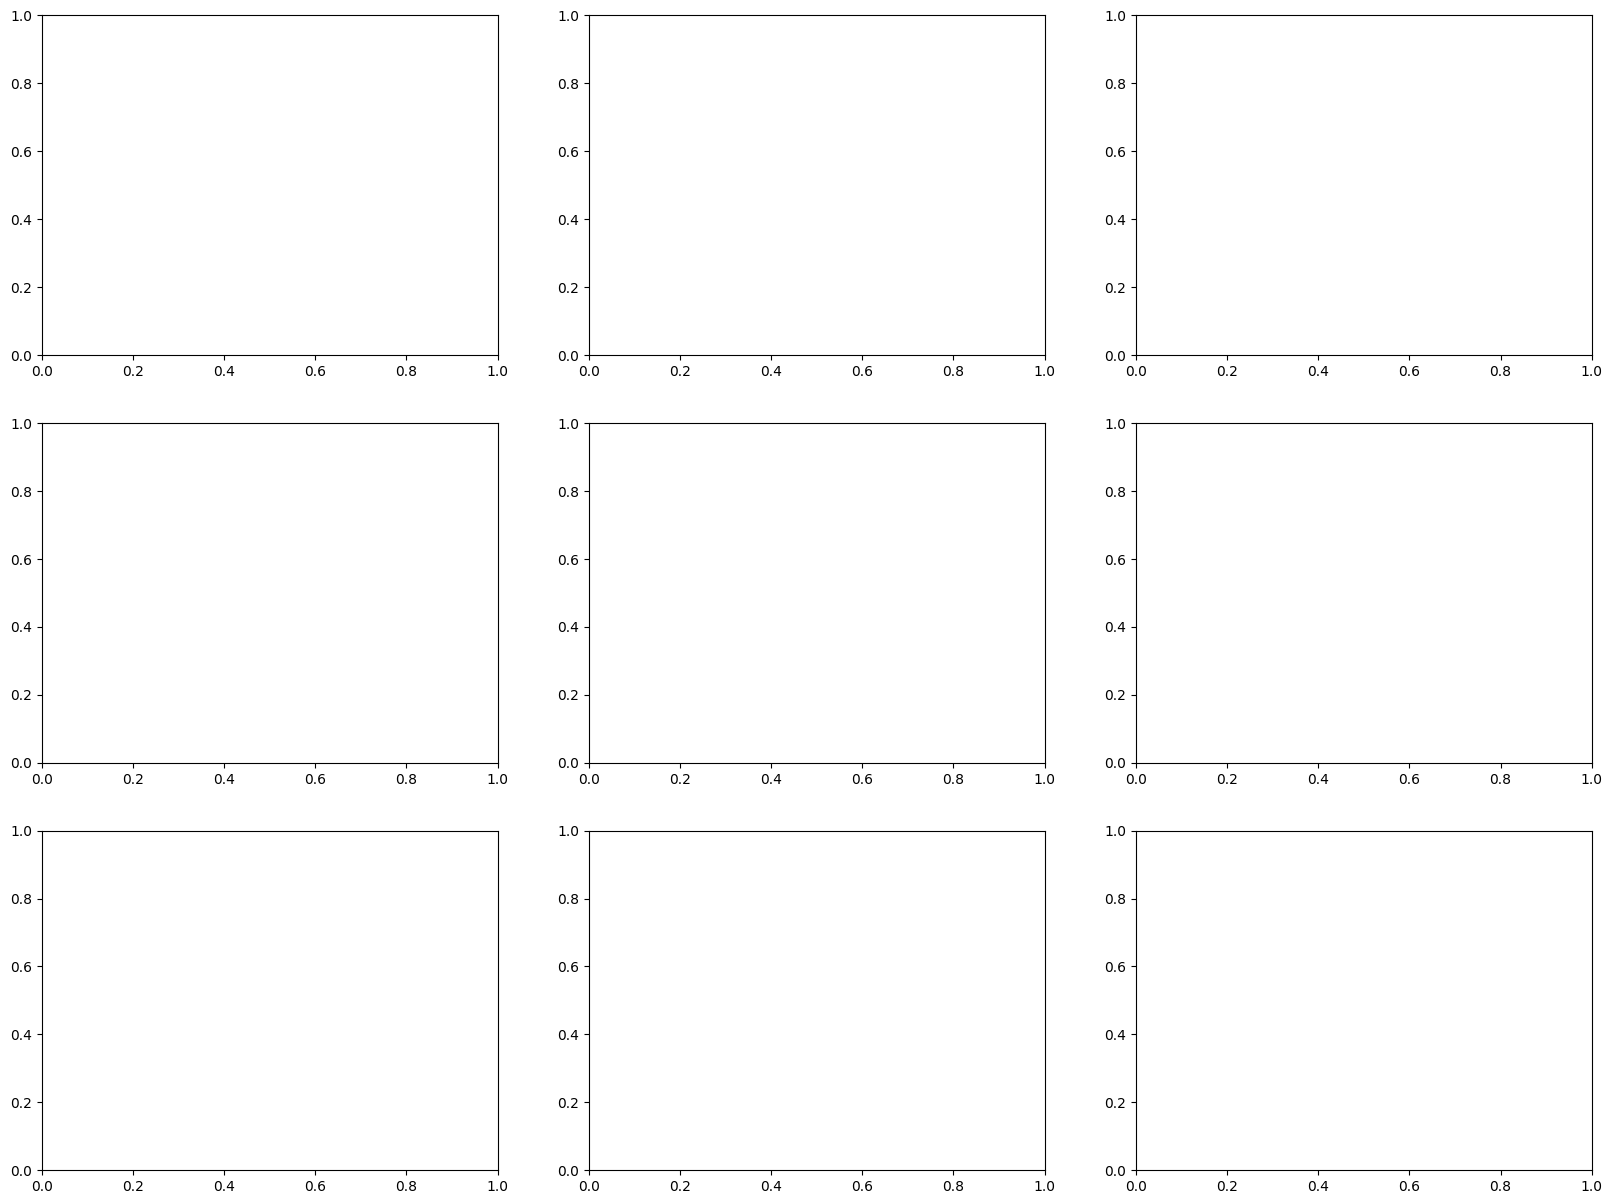

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

# 1️⃣ إجمالي الإيرادات

In [ ]:
total_revenue = df['Price'].sum()
axs[0].text(0.5, 0.5, f"Total Revenue: {total_revenue:,.2f} £", fontsize=16, ha='center', va='center', color='#004c6d')
axs[0].axis('off')


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

# 2️⃣ صافي الإيرادات بعد استبعاد الرحلات الملغاة أو المسترجعة

In [ ]:
net_revenue = df.loc[(df['Journey Status'] != 'Cancelled') & (df['Refund Request'] == 'No'), 'Price'].sum()
axs[1].text(0.5, 0.5, f"Net Revenue: {net_revenue:,.2f} £", fontsize=16, ha='center', va='center', color='#2176b7')
axs[1].axis('off')


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

# 3️⃣ متوسط سعر التذكرة

In [ ]:
avg_price = df['Price'].mean()
axs[2].text(0.5, 0.5, f"Average Ticket Price: {avg_price:,.2f} £", fontsize=16, ha='center', va='center', color='#57a0d3')
axs[2].axis('off')

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

# 4️⃣ متوسط السعر حسب فئة التذكرة

In [ ]:
sns.barplot(x='Ticket Class', y='Price', data=df, palette=custom_palette, ax=axs[3])
axs[3].set_title('Average Ticket Price per Class')

/tmp/ipython-input-1358643502.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticket Class', y='Price', data=df, palette=custom_palette, ax=axs[3])
/tmp/ipython-input-1358643502.py:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x='Ticket Class', y='Price', data=df, palette=custom_palette, ax=axs[3])


Text(0.5, 1.0, 'Average Ticket Price per Class')

# 5️⃣ متوسط السعر حسب نوع التذكرة

In [ ]:
sns.barplot(x='Ticket Type', y='Price', data=df, palette=custom_palette, ax=axs[4])
axs[4].set_title('Average Ticket Price per Ticket Type')

/tmp/ipython-input-349470295.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticket Type', y='Price', data=df, palette=custom_palette, ax=axs[4])
/tmp/ipython-input-349470295.py:1: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x='Ticket Type', y='Price', data=df, palette=custom_palette, ax=axs[4])


Text(0.5, 1.0, 'Average Ticket Price per Ticket Type')

# 6️⃣ تأثير Railcard على الأسعار

In [ ]:
sns.barplot(x='Railcard', y='Price', data=df, palette=custom_palette, ax=axs[5])
axs[5].set_title('Average Ticket Price by Railcard Type')

/tmp/ipython-input-91878389.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Railcard', y='Price', data=df, palette=custom_palette, ax=axs[5])
/tmp/ipython-input-91878389.py:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='Railcard', y='Price', data=df, palette=custom_palette, ax=axs[5])


Text(0.5, 1.0, 'Average Ticket Price by Railcard Type')

# 7️⃣ أعلى 10 مسارات من حيث الإيرادات

In [ ]:
route_revenue = df.groupby('Routes')['Price'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=route_revenue.values, y=route_revenue.index, palette=custom_palette, ax=axs[6])
axs[6].set_title('Top 10 Routes by Revenue')

/tmp/ipython-input-3906295917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=route_revenue.values, y=route_revenue.index, palette=custom_palette, ax=axs[6])
/tmp/ipython-input-3906295917.py:2: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=route_revenue.values, y=route_revenue.index, palette=custom_palette, ax=axs[6])


Text(0.5, 1.0, 'Top 10 Routes by Revenue')

# 8️⃣ الإيرادات بمرور الوقت

In [ ]:
revenue_time = df.groupby('Date of Purchase')['Price'].sum()
axs[7].plot(revenue_time.index, revenue_time.values, marker='o', color='#00BFFF')
axs[7].set_title('Revenue Over Time')
axs[7].set_xlabel('Date')
axs[7].set_ylabel('Revenue')

axs[8].axis('off')

plt.suptitle('💰 Sales Scope Analysis', fontsize=20, color='#004c6d')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(os.path.join(save_path, "Sales_Scope.png"), dpi=300)
plt.close()

/tmp/ipython-input-3474349926.py:11: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(save_path, "Sales_Scope.png"), dpi=300)


# ============================================================
# 👥 CUSTOMER SCOPE ANALYSIS
# ============================================================


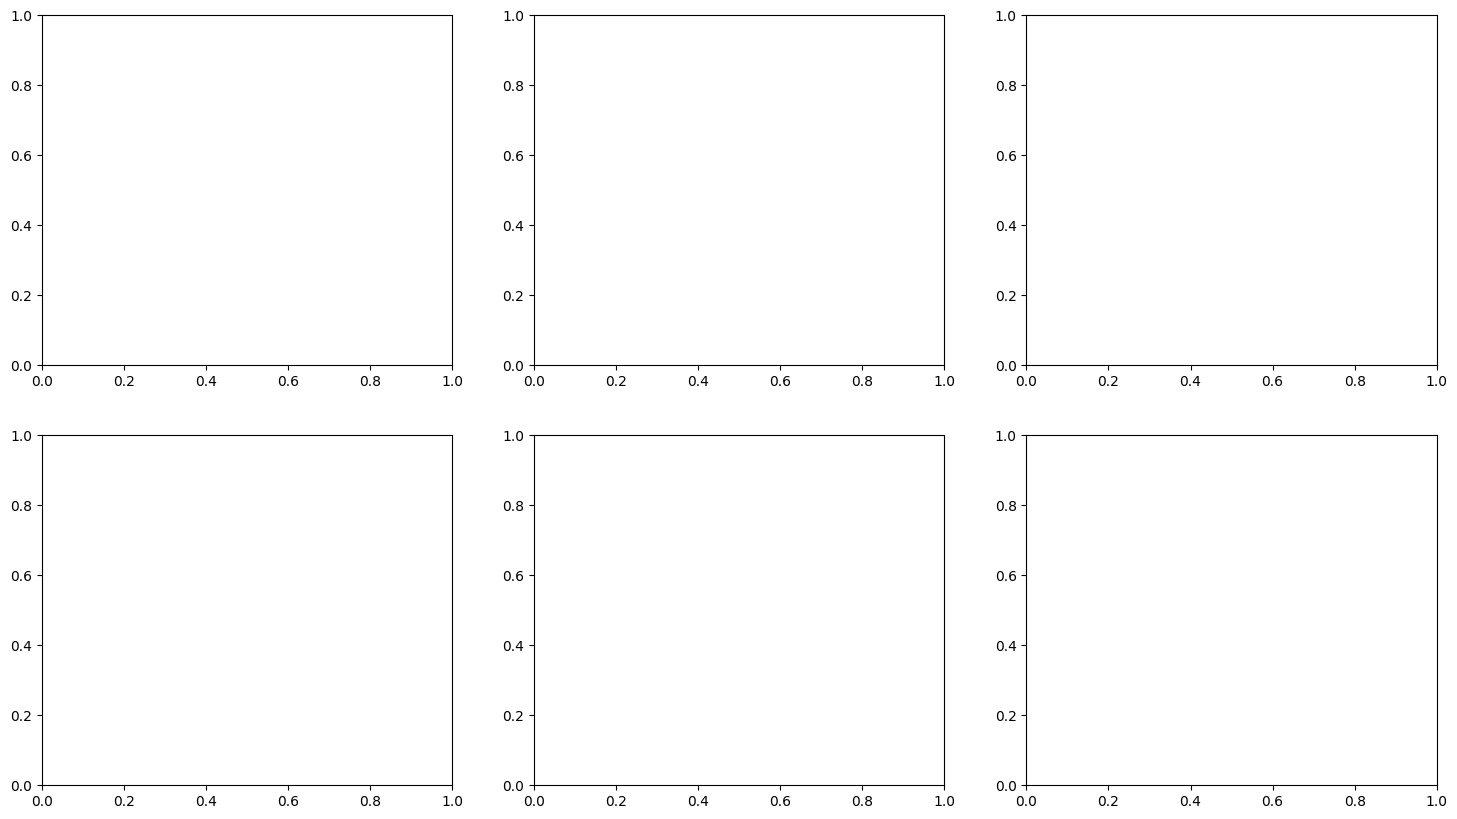

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

# 1️⃣ توزيع طرق الدفع

In [ ]:
payment_methods = df['Payment Method'].value_counts()
axs[0].pie(payment_methods.values, labels=payment_methods.index, autopct='%1.1f%%',
           startangle=140, colors=custom_palette)
axs[0].set_title('Payment Method Distribution')

Text(0.5, 1.0, 'Payment Method Distribution')

# 2️⃣ استخدام Railcards

In [ ]:
railcard_usage = df['Railcard'].value_counts()
sns.barplot(x=railcard_usage.values, y=railcard_usage.index, palette=custom_palette, ax=axs[1])
axs[1].set_title('Railcard Usage')

/tmp/ipython-input-1859288503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=railcard_usage.values, y=railcard_usage.index, palette=custom_palette, ax=axs[1])
/tmp/ipython-input-1859288503.py:2: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=railcard_usage.values, y=railcard_usage.index, palette=custom_palette, ax=axs[1])


Text(0.5, 1.0, 'Railcard Usage')

# 3️⃣ طلبات الاسترجاع حسب وسيلة الدفع

In [ ]:
refund_payment = df[df['Refund Request'] == 'Yes']['Payment Method'].value_counts()
sns.barplot(x=refund_payment.values, y=refund_payment.index, palette=custom_palette, ax=axs[2])
axs[2].set_title('Refund Requests by Payment Method')

/tmp/ipython-input-2870596449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=refund_payment.values, y=refund_payment.index, palette=custom_palette, ax=axs[2])
/tmp/ipython-input-2870596449.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x=refund_payment.values, y=refund_payment.index, palette=custom_palette, ax=axs[2])


Text(0.5, 1.0, 'Refund Requests by Payment Method')

# 4️⃣ الإنفاق المتوسط حسب نوع الـ Railcard

In [ ]:
sns.barplot(x='Railcard', y='Price', data=df, palette=custom_palette, ax=axs[3])
axs[3].set_title('Average Spending per Railcard Type')

/tmp/ipython-input-323912754.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Railcard', y='Price', data=df, palette=custom_palette, ax=axs[3])
/tmp/ipython-input-323912754.py:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='Railcard', y='Price', data=df, palette=custom_palette, ax=axs[3])


Text(0.5, 1.0, 'Average Spending per Railcard Type')

# 5️⃣ تفضيلات العملاء في أنواع التذاكر

In [ ]:
ticket_pref = df['Ticket Type'].value_counts()
sns.barplot(x=ticket_pref.values, y=ticket_pref.index, palette=custom_palette, ax=axs[4])
axs[4].set_title('Ticket Type Preference')

axs[5].axis('off')

plt.suptitle('👥 Customer Scope Analysis', fontsize=20, color='#004c6d')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(os.path.join(save_path, "Customer_Scope.png"), dpi=300)
plt.close()


/tmp/ipython-input-3690100216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_pref.values, y=ticket_pref.index, palette=custom_palette, ax=axs[4])
/tmp/ipython-input-3690100216.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x=ticket_pref.values, y=ticket_pref.index, palette=custom_palette, ax=axs[4])
/tmp/ipython-input-3690100216.py:9: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(save_path, "Customer_Scope.png"), dpi=300)


# ============================================================
# ⚙️ OPERATION SCOPE ANALYSIS
# ============================================================

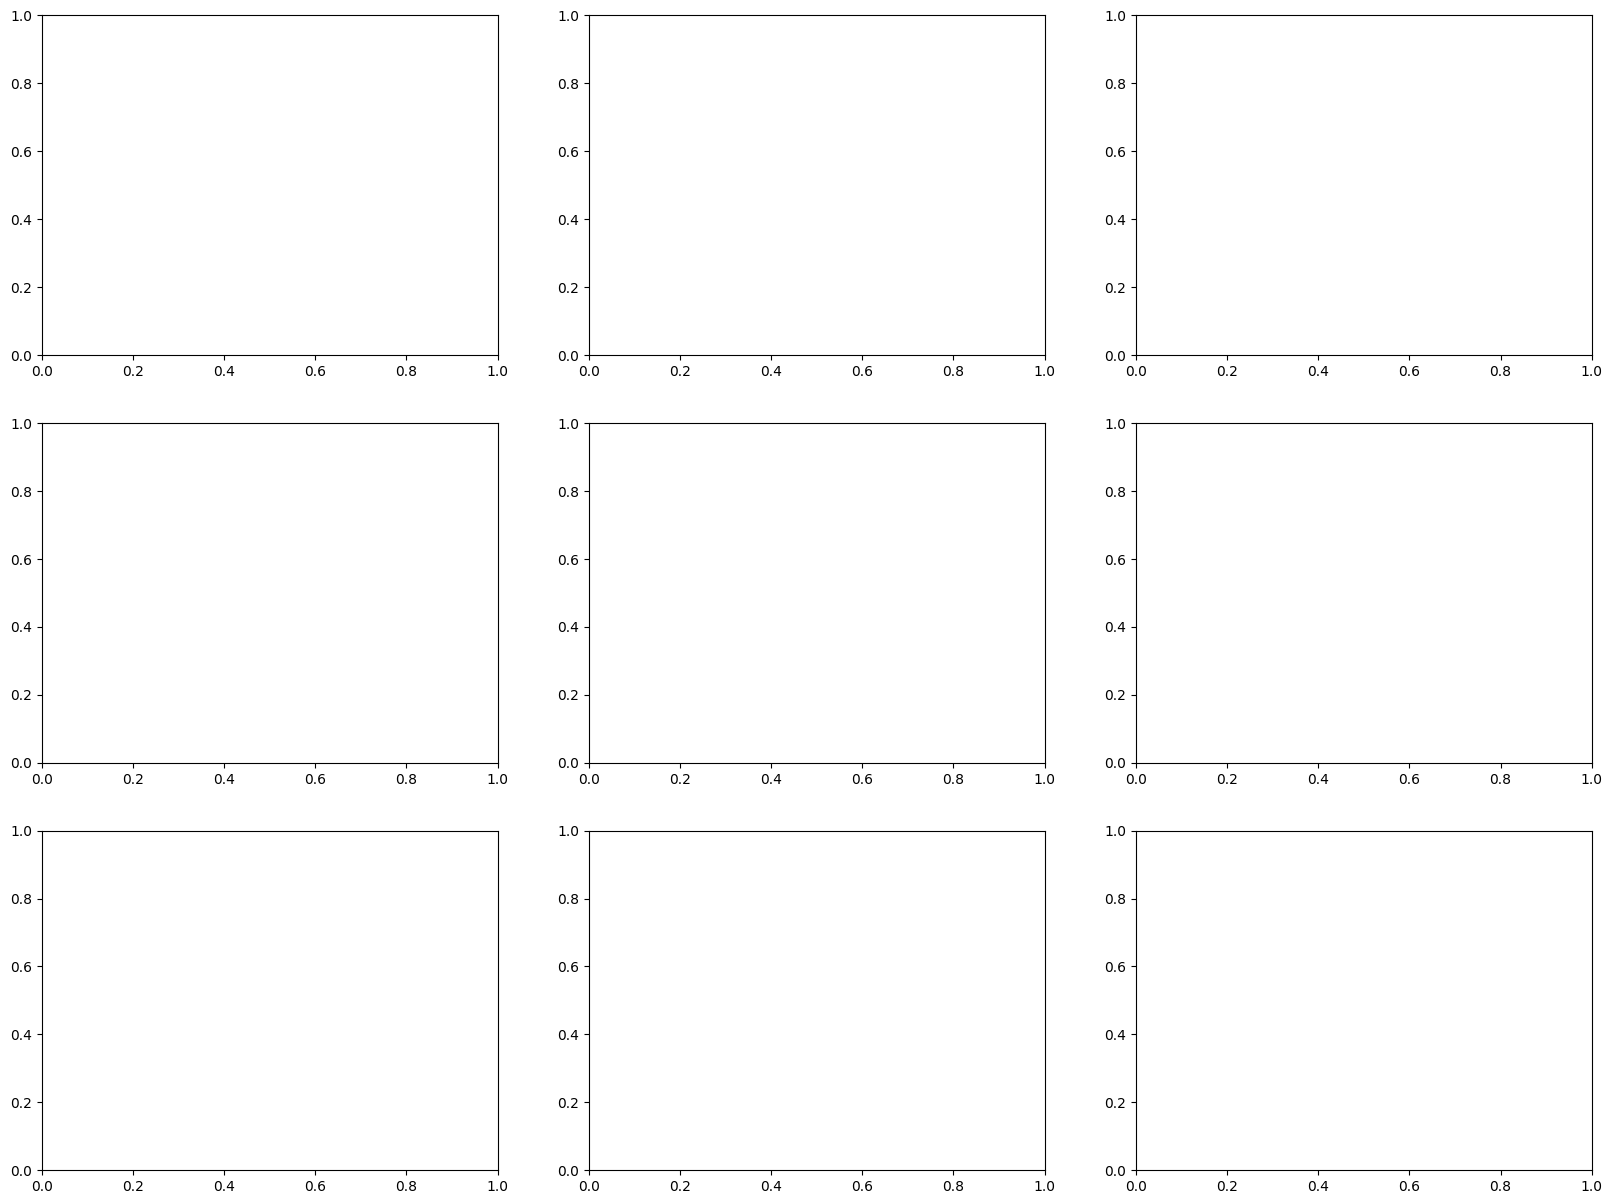

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

# 1️⃣ توزيع حالات الرحلات (ناجحة - متأخرة - ملغاة)

In [ ]:
sns.countplot(x='Journey Status', data=df, palette=custom_palette, ax=axs[0])
axs[0].set_title('Journey Status Distribution')

/tmp/ipython-input-31522980.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Journey Status', data=df, palette=custom_palette, ax=axs[0])
/tmp/ipython-input-31522980.py:1: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x='Journey Status', data=df, palette=custom_palette, ax=axs[0])


Text(0.5, 1.0, 'Journey Status Distribution')


# 2️⃣ أكثر أسباب التأخير شيوعًا

In [ ]:
delay_reasons = df[df['Reason for Delay'] != 'No Delay']['Reason for Delay'].value_counts().head(10)
sns.barplot(x=delay_reasons.values, y=delay_reasons.index, palette=custom_palette, ax=axs[1])
axs[1].set_title('Top 10 Reasons for Delay')

/tmp/ipython-input-980857848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_reasons.values, y=delay_reasons.index, palette=custom_palette, ax=axs[1])


Text(0.5, 1.0, 'Top 10 Reasons for Delay')

# 3️⃣ نسبة التأخير حسب أيام الأسبوع

In [ ]:
df['Day_of_Week'] = df['Date of Journey'].dt.day_name()
delay_by_day = df.groupby('Day_of_Week')['Journey Status'].apply(lambda x: (x == 'Delayed').mean() * 100)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
delay_by_day = delay_by_day.reindex(order)
sns.barplot(x=delay_by_day.values, y=delay_by_day.index, palette=custom_palette, ax=axs[2])
axs[2].set_title('Delay % by Day of Week')

/tmp/ipython-input-1203488835.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_by_day.values, y=delay_by_day.index, palette=custom_palette, ax=axs[2])
/tmp/ipython-input-1203488835.py:5: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=delay_by_day.values, y=delay_by_day.index, palette=custom_palette, ax=axs[2])


Text(0.5, 1.0, 'Delay % by Day of Week')

# 4️⃣ نسبة التأخير حسب ساعة الانطلاق

In [ ]:
df['Departure_Hour'] = pd.to_datetime(df['Departure Time'], errors='coerce').dt.hour
delay_by_hour = df.groupby('Departure_Hour')['Journey Status'].apply(lambda x: (x == 'Delayed').mean() * 100)
axs[3].plot(delay_by_hour.index, delay_by_hour.values, marker='o', color='#00BFFF')
axs[3].set_title('Delay % by Departure Hour')
axs[3].set_xlabel('Hour')
axs[3].set_ylabel('Delay Percentage')

/tmp/ipython-input-2014607667.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Departure_Hour'] = pd.to_datetime(df['Departure Time'], errors='coerce').dt.hour


Text(4.444444444444452, 0.5, 'Delay Percentage')

# 5️⃣ أكثر 10 مسارات تأخيرًا

In [ ]:
delayed_routes = df[df['Journey Status'] == 'Delayed'].groupby('Routes')['Routes'].count().sort_values(ascending=False).head(10)
sns.barplot(x=delayed_routes.values, y=delayed_routes.index, palette=custom_palette, ax=axs[4])
axs[4].set_title('Top 10 Delayed Routes')

/tmp/ipython-input-2172894003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delayed_routes.values, y=delayed_routes.index, palette=custom_palette, ax=axs[4])
/tmp/ipython-input-2172894003.py:2: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=delayed_routes.values, y=delayed_routes.index, palette=custom_palette, ax=axs[4])


Text(0.5, 1.0, 'Top 10 Delayed Routes')

# 6️⃣ متوسط وقت التأخير (إن وُجد)

In [ ]:
if 'Delay Time' in df.columns:
    avg_delay = df.loc[df['Journey Status'] == 'Delayed', 'Delay Time'].mean()
    axs[5].text(0.5, 0.5, f"Average Delay Time: {avg_delay:.2f} mins", fontsize=16, ha='center', va='center', color='#004c6d')
else:
    axs[5].text(0.5, 0.5, "No 'Delay Time' Column Found", fontsize=14, ha='center', va='center', color='red')
axs[5].axis('off')


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

# 7️⃣ نسبة الرحلات الملغاة

In [ ]:
cancel_rate = (df['Journey Status'] == 'Cancelled').mean() * 100
axs[6].text(0.5, 0.5, f"Cancellation Rate: {cancel_rate:.2f}%", fontsize=16, ha='center', va='center', color='#2176b7')
axs[6].axis('off')

axs[7].axis('off')
axs[8].axis('off')

plt.suptitle('⚙️ Operation Scope Analysis', fontsize=20, color='#004c6d')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(os.path.join(save_path, "Operation_Scope.png"), dpi=300)
plt.close()


# ============================================================
# 💾 Save Cleaned Data
# ============================================================

In [ ]:
df.to_csv(r"D:\railway_cleaned_full.csv", index=False)

print("✅ التحليل اكتمل بنجاح، وتم حفظ الصور في المجلد D:/Railway_Charts")

✅ التحليل اكتمل بنجاح، وتم حفظ الصور في المجلد D:/Railway_Charts
